In [234]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.decomposition import NMF, TruncatedSVD
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt 

In [11]:
import pickle
file = open("mag_df.pkl",'rb')
object_file = pickle.load(file)

In [12]:
file = open("mag_clean.pkl",'rb')
mag_clean = pickle.load(file)

In [13]:
file = open("cover_df.pkl",'rb')
cover_df = pickle.load(file)

In [14]:
file = open("cover_clean.pkl",'rb')
cover_clean = pickle.load(file)

In [98]:
file = open("mar_18.pkl",'rb')
mar_18 = pickle.load(file)

In [107]:
file = open("mar_18_2.pkl",'rb')
mar_18_2 = pickle.load(file)

In [209]:
file = open("full_df.pkl",'rb')
full_df = pickle.load(file)

### Word EDA

In [15]:
#column of tokened words for eda
whitespace_tokenizer = RegexpTokenizer("\s+", gaps = True)

mag_clean['tokened_text'] = [whitespace_tokenizer.tokenize(i) for i in mag_clean['cov_text_lower']]

In [108]:
date = []

for i in range(712,785):
    filepath = ('/Users/noramay/desktop/AllZips/Folder{}/date.txt'.format((i+1)))
    fh = open(filepath,"r")
    date.append(fh.read())

In [109]:
date

['feb 2019\n',
 'mar 2019\n',
 'sep 2018\n',
 'jan 2019\n',
 'dec 2018\n',
 'feb 2018\n',
 'apr 2018\n',
 'mar 2018\n',
 'may 2018\n',
 'aug 2018\n',
 'jun 2018\n',
 'oct 2018\n',
 'jan 2018\n',
 'feb 2017\n',
 'mar 2016\n',
 'jul 2018\n',
 'nov 2018\n',
 'nov 2017\n',
 'aug 2017\n',
 'oct 2017\n',
 'sep 2017\n',
 'mar 2017\n',
 'may 2017\n',
 'jun 2017\n',
 'dec 2017\n',
 'jan 2017\n',
 'jul 2016\n',
 'apr 2017\n',
 'jul 2017\n',
 'jan 2016\n',
 'feb 2016\n',
 'jun 2016\n',
 'aug 2016\n',
 'dec 2016\n',
 'may 2016\n',
 'nov 2016\n',
 'apr 2016\n',
 'sep 2016\n',
 'oct 2016\n',
 'jan 2015\n',
 'mar 2015\n',
 'feb 2013\n',
 'mar 2013\n',
 'sep 2015\n',
 'dec 2015\n',
 'nov 2015\n',
 'oct 2015\n',
 'aug 2015\n',
 'jul 2015\n',
 'jun 2015\n',
 'apr 2015\n',
 'feb 2015\n',
 'may 2015\n',
 'jun 2013\n',
 'may 2013\n',
 'apr 2013\n',
 'jan 2013\n',
 'aug 2013\n',
 'oct 2013\n',
 'nov 2014\n',
 'nov 2013\n',
 'dec 2013\n',
 'oct 2014\n',
 'feb 2014\n',
 'aug 2014\n',
 'jan 2014\n',
 'mar 2014

In [110]:
from datetime import datetime
datetime_ob = []
for i in range(len(range(712,785))):
    date[i] = date[i].strip('\n')
    try:
        datetime_ob.append(datetime.strptime(date[i], '%b %Y'))
    except ValueError:
        print(i)
        datetime_ob.append('extra')

In [31]:
del datetime_ob[-1]

In [111]:
mar_18_2['datetime'] = datetime_ob

In [205]:
#remove stop words from tokened lyrics
def rm_stword(df, st_words):
    for i in df.index:
        df['cov_text_lower'][i] = [word for word in df['cov_text_lower'][i] if word not in st_words]
    return df
#for i in range(len(more_musicals_df_old)):
#    more_musicals_df_old['tokened_lyrics_st'][i] = [word for word in more_musicals_df_old['tokened_lyrics'][i] if word not in st_words]

In [341]:
full_df

,cov_text_lower,datetime
0,july ¢ wealthy young students embr...,1964-07-01 00:00:00
1,may ° guided tour of the sac a compl...,1964-05-01 00:00:00
2,june idg ° mm cenatten dev ° oe ...,1964-06-01 00:00:00
3,july ¢ wealthy young students embr...,1964-07-01 00:00:00
4,august bn hes by shirley ann gr...,1964-08-01 00:00:00
5,pomel ari auch » copyright © pr...,1964-09-01 00:00:00
6,october oa parenthood wit...,1964-10-01 00:00:00
7,november ¢ please mr president ...,1964-11-01 00:00:00
8,december ¢ do religious schools teach ...,1964-12-01 00:00:00
9,vorking womens problems ty betty friedan w...,1965-01-01 00:00:00


In [32]:
mag_clean['datetime'] = datetime_ob

In [116]:
mar_18_single['cov_text_lower'] = mar_18_single['cov_text']

/Users/noramay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
cover_clean['datetime'] = datetime_ob

In [35]:
mag_single = mag_clean[mag_clean['datetime'] != 'extra']

In [47]:
cover_single = cover_clean[cover_clean['datetime'] != 'extra']

In [106]:
mar_18_single = mar_18[mar_18['datetime'] != 'extra']

In [119]:
full_df = pd.concat([mar_18_single,mar_18_2,cover_single], ignore_index = True)

/Users/noramay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [121]:
full_df = full_df.drop('cov_text', axis = 1)
full_df = full_df.drop('pub_date', axis = 1)

In [151]:
full_df.to_pickle('full_df.pkl')

In [342]:
full_df

,cov_text_lower,datetime
0,july ¢ wealthy young students embr...,1964-07-01 00:00:00
1,may ° guided tour of the sac a compl...,1964-05-01 00:00:00
2,june idg ° mm cenatten dev ° oe ...,1964-06-01 00:00:00
3,july ¢ wealthy young students embr...,1964-07-01 00:00:00
4,august bn hes by shirley ann gr...,1964-08-01 00:00:00
5,pomel ari auch » copyright © pr...,1964-09-01 00:00:00
6,october oa parenthood wit...,1964-10-01 00:00:00
7,november ¢ please mr president ...,1964-11-01 00:00:00
8,december ¢ do religious schools teach ...,1964-12-01 00:00:00
9,vorking womens problems ty betty friedan w...,1965-01-01 00:00:00


In [200]:
#get frequencies of indiv words after stop words have been removed using rm_stword
def freq_word(df):
    fdist = []
    word_list = df.cov_text_lower.tolist()
    flat_list = [item for sublist in word_list for item in sublist]
    fdist = nltk.FreqDist(flat_list)
    return fdist

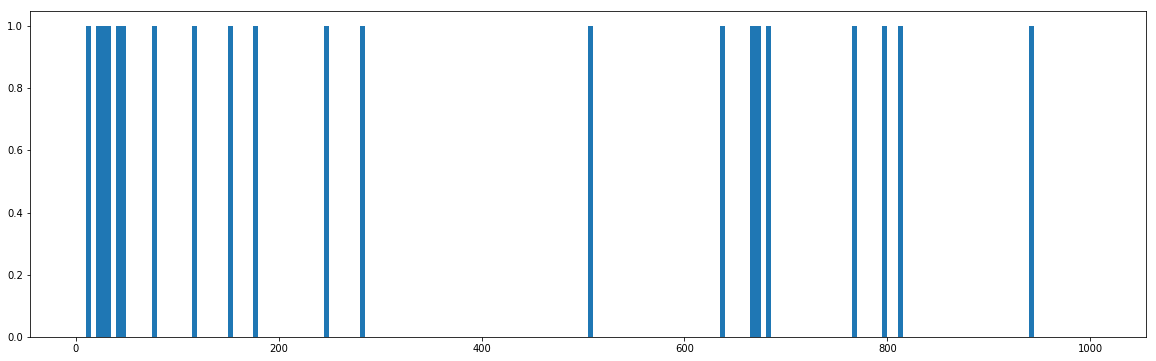

In [201]:
fdist = freq_word(full_df)
plt.figure(figsize=(20,6))
plt.hist(fdist.values(), bins = 200, range = (5,1005));

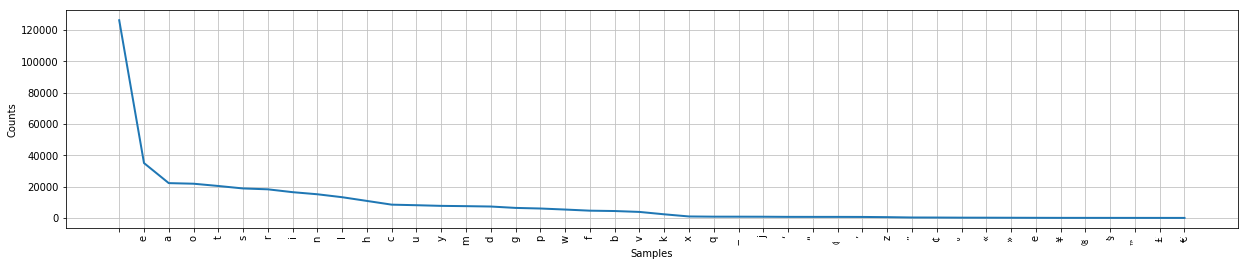

In [202]:
plt.figure(figsize=(21,4))
fdist.plot(70,cumulative=False)

In [203]:
fdist.most_common(40)

[(' ', 126284),
 ('e', 35065),
 ('a', 22237),
 ('o', 21862),
 ('t', 20412),
 ('s', 18835),
 ('r', 18282),
 ('i', 16460),
 ('n', 15118),
 ('l', 13239),
 ('h', 10864),
 ('c', 8484),
 ('u', 8127),
 ('y', 7708),
 ('m', 7528),
 ('d', 7291),
 ('g', 6405),
 ('p', 6023),
 ('w', 5359),
 ('f', 4639),
 ('b', 4410),
 ('v', 3843),
 ('k', 2318),
 ('x', 942),
 ('q', 811),
 ('—', 798),
 ('j', 767),
 ('‘', 684),
 ('“', 671),
 ('©', 668),
 ('’', 635),
 ('z', 506),
 ('”', 284),
 ('¢', 249),
 ('°', 178),
 ('«', 151),
 ('»', 117),
 ('é', 77),
 ('¥', 48),
 ('®', 42)]

### Vectorize and Model

In [203]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')
whitespace_tokenizer = RegexpTokenizer("\s+", gaps = True)

def tokenize(text):
    return [word for word in tokenizer.tokenize(text.lower())]

In [382]:
def get_topics(text, n_topics, my_st_words, my_max_df, my_min_df):
    vectorizer = (CountVectorizer(stop_words = my_st_words,
                                 analyzer='word', token_pattern="\\b[a-z]{3,}\\b", 
                                  max_df=my_max_df, min_df=my_min_df))
    X = vectorizer.fit_transform(text)
    words = np.array(vectorizer.get_feature_names())

    model = NMF(n_components=n_topics)
    doc_topics = model.fit_transform(X)
    C = model.components_

    for topic_idx, topic in enumerate(C):
        print("Topic #%d:" % topic_idx)
        print(" ".join([words[i]
                    for i in topic.argsort()[:-15 - 1:-1]]))
        print()

In [237]:
def get_topics_lsa(text, n_topics, my_st_words, my_max_df, my_min_df):
    vectorizer = (CountVectorizer(stop_words = my_st_words,
                                 analyzer='word', token_pattern="\\b[a-z]{3,}\\b", 
                                  max_df=my_max_df, min_df=my_min_df))
    X = vectorizer.fit_transform(text)
    words = np.array(vectorizer.get_feature_names())

    model = TruncatedSVD(n_components = n_topics)
    doc_topics = model.fit_transform(X)
    C = model.components_

    for topic_idx, topic in enumerate(C):
        print("Topic #%d:" % topic_idx)
        print(" ".join([words[i]
                    for i in topic.argsort()[:-10 - 1:-1]]))
        print()
        


In [363]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize_stem(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]


In [364]:

def get_topics_stem(text, n_topics, my_st_words, my_max_df, my_min_df):
    vectorizer = (CountVectorizer(tokenizer = tokenize_stem, stop_words = my_st_words,
                                 analyzer='word', token_pattern="\\b[a-z]{3,}\\b", 
                                  max_df=my_max_df, min_df=my_min_df))
    X = vectorizer.fit_transform(text)
    words = np.array(vectorizer.get_feature_names())

    model = NMF(n_components=n_topics)
    doc_topics = model.fit_transform(X)
    C = model.components_

    for topic_idx, topic in enumerate(C):
        print("Topic #%d:" % topic_idx)
        print(" ".join([words[i]
                    for i in topic.argsort()[:-10 - 1:-1]]))
        print()

In [368]:
modern_df = full_df[full_df.datetime.dt.year > 1980]

In [392]:
modern_df

,cov_text_lower,datetime
18,o i copyright © proquest llc all res...,1982-06-01 00:00:00
19,copyright © proquest llc all rig...,1997-04-01 00:00:00
20,aan rag mat eer more fore eplay please ...,1992-05-01 00:00:00
21,naughty an ks sex das vont to on your guy...,2006-12-01 00:00:00
22,boosters weal me new fecret asmart wayt...,2006-10-01 00:00:00
23,oia take the love te what’ s hot for fall...,2006-09-01 00:00:00
24,he craves truss often fal dit whar terre s...,2006-08-01 00:00:00
25,ig “a man id days we brittany murphy ’...,2006-07-01 00:00:00
26,how tse “ beyond rea kama vou ay” ...,2006-06-01 00:00:00
27,‘ is oe orgasms unlimited mrotestn...,2006-05-01 00:00:00


In [385]:
get_topics(modern_df['cov_text_lower'], 5, st_words, 0.15, 3)

Topic #0:
tricks bed sexy things hot guys never secret moves guy ever feel pleasure really see

Topic #1:
astrologer bedside cosmos guide health career astral bonus star money plus chart predictions advice year

Topic #2:
excerpt best girl youre marriage see ever making woman book star know job friends relationship

Topic #3:
money big meee turn work hot sexy hollywood short stories still discover would young girl

Topic #4:
bad know secrets surprising couples reveal boyfriend wont terrace readers believe thing bare ego ins



In [391]:
get_topics(modern_df['cov_text_lower'], 10, st_words, 0.15, 3)

Topic #0:
hot bed sexy guys never things moves guy see really naughty try sexiest trick tricks

Topic #1:
astrologer bedside cosmos health career guide astral bonus money star plus chart predictions advice matches

Topic #2:
excerpt see girl star plus tantalizing makeup ever married eet friends woman secrets marriage real

Topic #3:
money big meee work hollywood quiz hot good still short sexy young makes stories neurotic

Topic #4:
bad know secrets surprising couples reveal boyfriend thing terrace readers believe wont ego ins made

Topic #5:
read things movie keep beautiful working fast bitchy husbands discover trust turn tom show straight

Topic #6:
guide interested youre girls know everything mary relationships okay christmas left turn marriage cosmos survival

Topic #7:
best ahead getting scary youre power years sexy turning learn loving among ill hidden thriller

Topic #8:
happen know girl help ere even rape living sure perhaps stories someone turn got short

Topic #9:
feel tricks 

In [241]:
get_topics_lsa(cover_single['cov_text_lower'], 7, st_words, 1.0, 10)

Topic #0:
love novel sex come best plus make stories short complete

Topic #1:
novel complete mystery short murder husband plus stories fiction suspense

Topic #2:
love novel stories bonus making guide cosmos mary bedside astrologer

Topic #3:
plus astrologer sex bedside money career health star cosmos guide

Topic #4:
best short plus stories seller fiction story two great big

Topic #5:
make best mystery astrologer bedside guide career complete year health

Topic #6:
come best fiction want beauty two sensational plus back quiz



In [245]:
get_topics(cover_single['cov_text_lower'], 15, st_words, 0.25, 5)

Topic #0:
make ways know youre ever marriage big cosmomag smart feel

Topic #1:
astrologer bedside career health guide cosmos bonus money astral year

Topic #2:
stories plus short two fiction work summer big five making

Topic #3:
complete mystery murder husband story suspense summer special macdonald money

Topic #4:
best seller book great sensational fantastic bea making clark superstar

Topic #5:
sex marriage around know help days ways easy safe youre

Topic #6:
star movie much story quiz super short shape plus without

Topic #7:
sexy tricks bed things bad secret really feel pleasure never

Topic #8:
excerpt real plus fiction people leave author marriage shirley maclaine

Topic #9:
ways thin story interested want stay world amazing power ofa

Topic #10:
money big young know meee quiz thriller youre even sexy

Topic #11:
diet husband high young low latest power bonanza james famous

Topic #12:
good report whats true book sure paul stop sexual weeks

Topic #13:
back stories best story

In [258]:
#establish and add on to stop words
st_words = stopwords.words('english')

my_words = (['proquest','cover','copyright','ee','eee','ae','©','«','»','e','oe','rights','new','york',
             'llc', 'all', 'rights','reserve','reserved','°','§','\"','\"','®',"\'"
             'cosmopolitan','president','subscription','service','vice','neutrogena',
            'barbara','richard','moines','william','box','offices','karen','nancy','liz',
            'hearst','copies','please','street','ellen','food','jane','susan','pat','cosmo',
            'fisher','street','avenue','helen','executive','assistants','one','editor','director',
            'issue','published','months','date','preceding','filing','get','editors',
            'sadowsky','john','robert','iowa','des','levine','ursula','nat','morgan',
            'cece','rubinstein','cee','helena','ccc',
            'abov', 'ani', 'assist', 'avenu', 'becaus', 'befor', 'copi', 'director',
             'issu', 'doe', 'dure', 'execut', 'file', 'levin', 'moin', 'month', 'nanci', 
             'offic', 'onc', 'onli', 'ourselv', 'pleas', 'preced', 'presid', 'publish', 
             'reserv', 'right', 'sadowski', 'servic', "should'v", 'subscript', 'themselv', 
             'veri', 'whi', "you'r", "you'v", 'yourselv','cosmopolitan', 'plea', 'prece',
            'catherin','dunn','joyc','oo','ooo','coc','occ','n','clapperton','j','g','jon',
            'anthoni', 'cc','rpm','terrac','q','iy','al','e','rae','rael','bee','rpc','arrose',
            'nee','est','alt','aan','pee','ove','aoe','vari','yee','een','ina','wee',
            'hee','eer','www','com','cant','eae','page','canada','june','december','january',
            'october','february','march','april','may','july','august','september','november',
            'tell','like'])#'man','woman','women','men','life','girl','girls'])
st_words.extend(my_words)

In [261]:
get_topics(full_df['cov_text_lower'], 6, st_words, 0.2, 10)
#relationships, mysteries, sex, fiction, relationships2, beauty, relationship3, misc. (8 topics, 0.3)
#misc, mysteries, sex, fiction, relationships, beauty (6 topics, 0.3)
#relationships, fiction, misc, mystery, resolutions, sex (6, 0.2, 10)
#life, fiction/movies, relationships, mysteries, resolutions, m 

#life/relationships, fiction, misc, mysteries, resolutions, sex (6, 0.2, 10)



Topic #0:
man life woman ways super way rich much affair know

Topic #1:
best girl plus short stories girls story fiction life seller

Topic #2:
men women first excerpt big girl together lovers making stunning

Topic #3:
complete mystery murder husband see stories girls short money summer

Topic #4:
astrologer bedside money career guide cosmos health bonus star year

Topic #5:
make ways life sexy ever good bed hot know tricks



In [174]:
full_df.cov_text_lower[176]

'        youve never thought of  without flatabs ue es     ve   rage ae ah ee ferlings  “ th hworkfael isis selfie special      it  ie  nofilter oe h ll beauty tricks pa'

In [163]:
type(full_df.datetime[0])

datetime.datetime

### START WORKING HERE

In [436]:
#Chosen Model:
vectorizer = (CountVectorizer(stop_words = st_words,
                                 analyzer='word', token_pattern="\\b[a-z]{3,}\\b", 
                                  max_df=0.2, min_df=10))
X = vectorizer.fit_transform(full_df['cov_text_lower'])
words = np.array(vectorizer.get_feature_names())

model = NMF(n_components=6)
doc_topics = model.fit_transform(X)
C = model.components_

In [437]:
H = pd.DataFrame(doc_topics.round(5),
             index = [x for x in full_df['datetime']],
             columns = ["relationships","fiction","misc","mystery","resolutions","sex"])


In [438]:
H2 = H.sort_index()

In [439]:
H2 = H2.apply(lambda x: x/x.sum(), axis=1)

In [268]:
#H2['topic_label'] = H2.idxmax(axis=1)

In [440]:
H2 = H2.dropna()

In [441]:
H2 = H2.reset_index()

In [442]:
H2 = H2.rename(index=str, columns={"index": "datetime"})

In [443]:
H3 = H2.groupby(H2.datetime.dt.year).mean()

In [459]:
H3.iloc[-1]

relationships    0.100494
fiction          0.312382
misc             0.056747
mystery          0.008648
resolutions      0.024005
sex              0.497724
Name: 2019, dtype: float64

In [335]:
import matplotlib.pyplot as plt

In [ ]:
H3

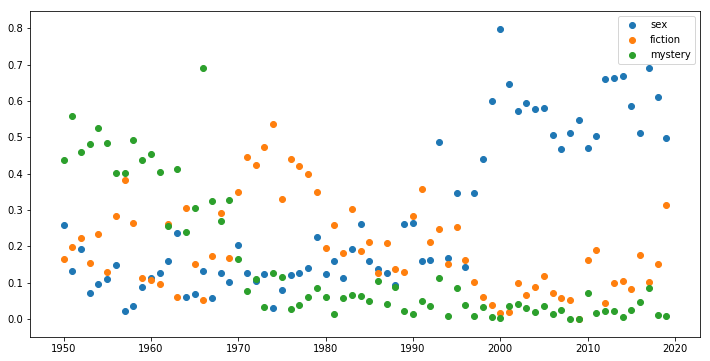

In [474]:
plt.figure(figsize=(12,6))
plt.scatter(H3.index, H3['sex'])
plt.scatter(H3.index, H3['fiction'])
plt.scatter(H3.index, H3['mystery'])
plt.legend(['sex','fiction','mystery'])

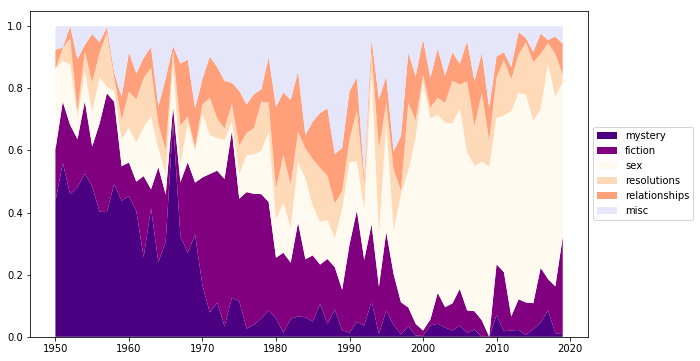

In [558]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
plt.stackplot(H3.index, H3['mystery'], H3['fiction'], H3['sex'],H3['resolutions'],H3['relationships'],H3['misc'], labels = ['mystery','fiction','sex','resolutions','relationships','misc'], colors=['indigo','purple','floralwhite','peachpuff','lightsalmon','lavender']);
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [450]:
H2 = H2.apply(lambda x: x/x.sum(), axis=1)

TypeError: ("unsupported operand type(s) for +: 'Timestamp' and 'float'", 'occurred at index 0')

In [86]:
H = H.drop('publishing',axis=1)

    

In [87]:
H['topic_label'] = H.idxmax(axis=1)

In [393]:
#modern model:
#get_topics(modern_df['cov_text_lower'], 10, st_words, 0.15, 3)
#Chosen Model:
vectorizer = (CountVectorizer(stop_words = st_words,
                                 analyzer='word', token_pattern="\\b[a-z]{3,}\\b", 
                                  max_df=0.15, min_df=10))
X = vectorizer.fit_transform(modern_df['cov_text_lower'])
words = np.array(vectorizer.get_feature_names())

model = NMF(n_components=10)
doc_topics = model.fit_transform(X)
C = model.components_

In [396]:
Mod = pd.DataFrame(doc_topics.round(5),
             index = [x for x in modern_df['datetime']],
             columns = ["sex","astrology","friends_makeup","cover_girl","secrets","misc","hints","power","human_interest","diet_beauty"])


In [397]:
Mod2 = Mod.sort_index()
Mod2 = Mod2.apply(lambda x: x/x.sum(), axis=1)
Mod2 = Mod2.dropna()
Mod2 = Mod2.reset_index()
Mod2 = Mod2.rename(index=str, columns={"index": "datetime"})

In [433]:
Mod4 = Mod3.drop(index = 2019)

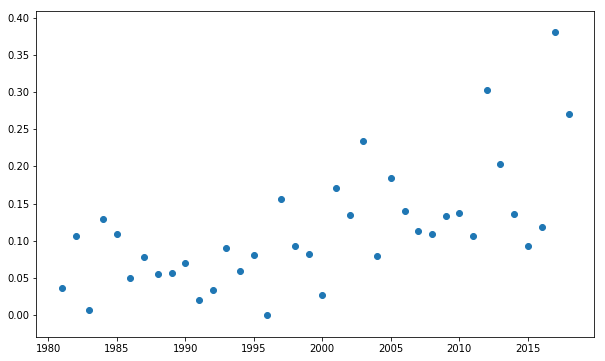

In [434]:
plt.figure(figsize=(10,6))
Mod3 = Mod2.groupby(Mod2.datetime.dt.year).mean()
plt.scatter(Mod4.index,Mod4['power'])

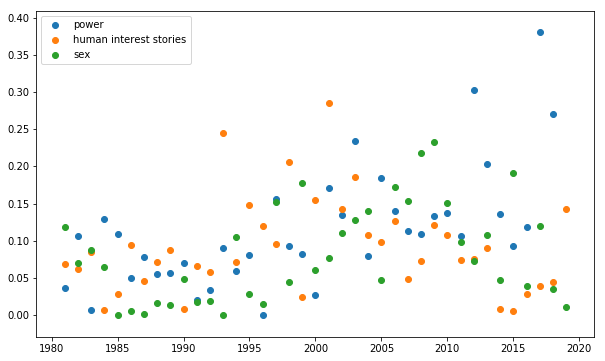

In [481]:
plt.figure(figsize=(10,6))
plt.scatter(Mod4.index,Mod4['power'])
plt.scatter(Mod3.index,Mod3['human_interest'])
plt.scatter(Mod3.index,Mod3['sex'])
plt.legend(['power','human interest stories','sex'])

In [533]:
Mod4.columns
'sex', 'astrology', 'friends_makeup', 'cover girl', 'secrets', 'misc',
       'hints', 'power', 'human_interest', 'diet_beauty'

IndentationError: unexpected indent (<ipython-input-533-abd5633c2c49>, line 3)

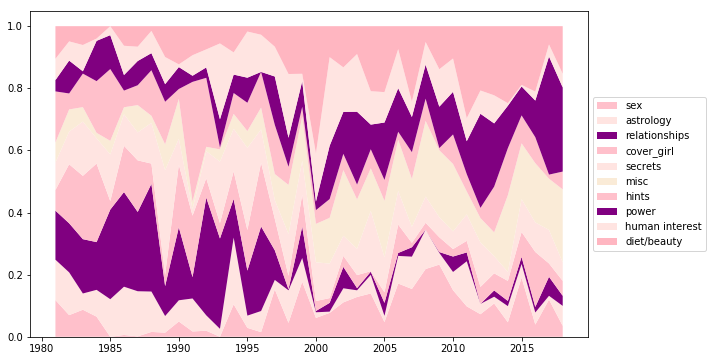

In [554]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
plt.stackplot(Mod4.index, Mod4["sex"],Mod4["astrology"],Mod4["friends_makeup"],Mod4["cover_girl"],Mod4["secrets"],Mod4["misc"],Mod4["hints"],Mod4["power"],Mod4["human_interest"],Mod4["diet_beauty"], labels = ['sex', 'astrology', 'relationships', 'cover_girl', 'secrets', 'misc','hints', 'power', 'human interest', 'diet/beauty'], colors = ['pink','mistyrose','purple','pink','mistyrose','antiquewhite','pink','purple','mistyrose','lightpink'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

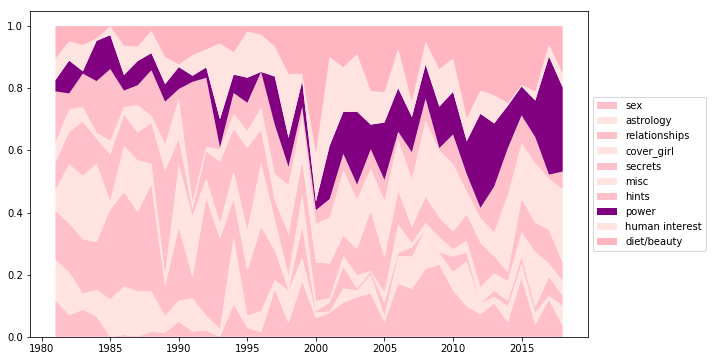

In [584]:
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
plt.stackplot(Mod4.index, Mod4["sex"],Mod4["astrology"],Mod4["friends_makeup"],Mod4["cover_girl"],Mod4["secrets"],Mod4["misc"],Mod4["hints"],Mod4["power"],Mod4["human_interest"],Mod4["diet_beauty"], labels = ['sex', 'astrology', 'relationships', 'cover_girl', 'secrets', 'misc','hints', 'power', 'human interest', 'diet/beauty'], colors = ['pink','mistyrose','pink','mistyrose','pink','mistyrose','pink','purple','mistyrose','lightpink'])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

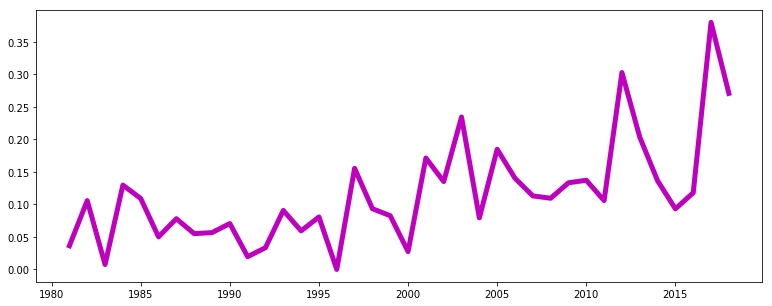

In [611]:
plt.figure(figsize=(13,5))
ax = plt.subplot(111)
plt.plot(Mod4.index, Mod4["power"],'m',linewidth = 5)
#plt.plot(X, pred, 'c:')

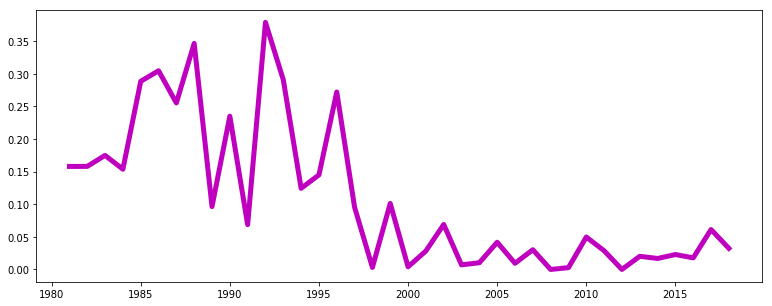

In [612]:
plt.figure(figsize=(13,5))
ax = plt.subplot(111)
plt.plot(Mod4.index, Mod4["friends_makeup"],'m',linewidth = 5)


In [566]:
from sklearn.linear_model import LinearRegression

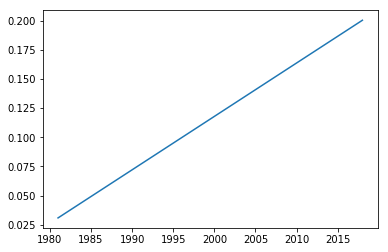

In [572]:
lr = LinearRegression()
array = np.array(Mod4.index)
X = array.reshape(-1, 1)
lr.fit(X, Mod4['power'])
pred = lr.predict(X)


In [594]:
lr = LinearRegression()
array = np.array(Mod4.index)
X2 = array.reshape(-1, 1)
lr.fit(X2[0:18], Mod4["friends_makeup"][0:18])
pred2 = lr.predict(X2)


In [598]:
lr = LinearRegression()
array = np.array(Mod4.index)
X3 = array.reshape(-1, 1)
lr.fit(X3[17:], Mod4["friends_makeup"][17:])
pred3 = lr.predict(X3)


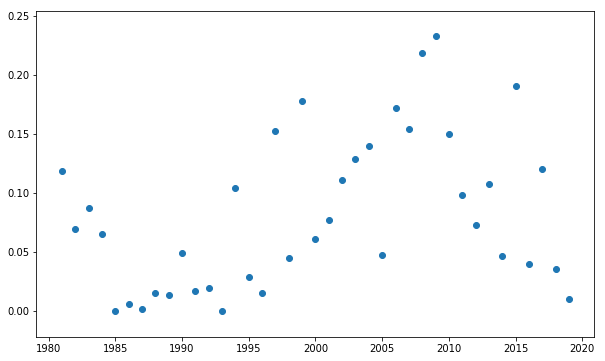

In [420]:
plt.figure(figsize=(10,6))
plt.scatter(Mod3.index,Mod3['sex'])
#shows where my computer vision is more or less sucessful?

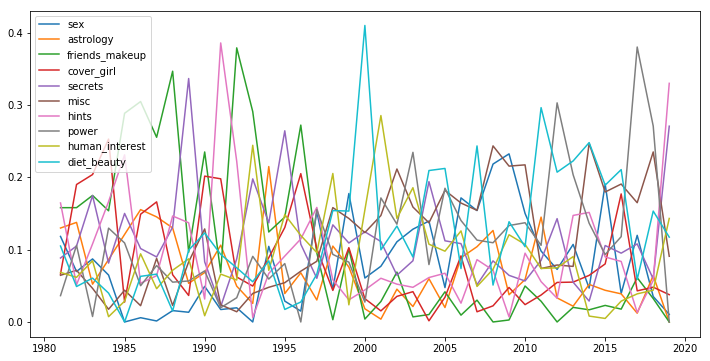

In [426]:
plt.figure(figsize=(12,6))
plt.plot(Mod3)
plt.legend(Mod3.columns)